In [1]:
from Arm_Lib import Arm_Device
import time

In [2]:
class RoboArm:
    DEFAULT_MOVE_SPEED = 1000  # ms
    JOINT_ATTRS = ["base", "shoulder", "elbow", "wrist", "wrist_rot", "grip"]

    def __init__(self):
        self.Arm = Arm_Device()
        print("Connected!")
        time.sleep(0.2) # We can't read "ready" state from arm so we just have to wait

        self.move_speed = self.DEFAULT_MOVE_SPEED
        self.recalibrate()

    # ------------------
    # Low-level helpers
    # ------------------

    def adjust(self, angles=None):
        """Send current joint state to the arm"""
        
        if angles is not None:
            self.set_joints(angles)
        
        self.Arm.Arm_serial_servo_write6(
            self.base,
            self.shoulder,
            self.elbow,
            self.wrist,
            self.wrist_rot,
            self.grip,
            self.move_speed
        )

    def reset_move_speed(self):
        self.move_speed = self.DEFAULT_MOVE_SPEED

    def set_move_speed(self, speed_ms=None):
        if speed_ms is not None:
            self.move_speed = int(speed_ms)
            
    def set_unless_none(self, attr, value):
        if value is not None:
            setattr(self, attr, value)

    # ------------------
    # Joint setters
    # ------------------

    def set_base(self, angle):
        self.set_unless_none("base", angle)

    def set_shoulder(self, angle):
        self.set_unless_none("shoulder", angle)

    def set_elbow(self, angle):
        self.set_unless_none("elbow", angle)

    def set_wrist(self, angle):
        self.set_unless_none("wrist", angle)

    def set_wrist_rot(self, angle):
        self.set_unless_none("wrist_rot", angle)

    def set_grip(self, angle):
        self.set_unless_none("grip", angle)

    def set_joints(self, angles):
        assert len(angles) == 6
        
        for i,joint in enumerate(self.JOINT_ATTRS):
            self.set_unless_none(joint, angles[i])

    def get_joints(self):
        """Return current software-tracked pose"""
        return [
            self.base,
            self.shoulder,
            self.elbow,
            self.wrist,
            self.wrist_rot,
            self.grip,
        ]

    # ------------------
    # Calibration / readback
    # ------------------

    def recalibrate(self):
        """Read current servo positions into software state"""
        self.set_unless_none("base", self.Arm.Arm_serial_servo_read(1))
        self.set_unless_none("shoulder", self.Arm.Arm_serial_servo_read(2))
        self.set_unless_none("elbow", self.Arm.Arm_serial_servo_read(3))
        self.set_unless_none("wrist", self.Arm.Arm_serial_servo_read(4))
        self.set_unless_none("wrist_rot", self.Arm.Arm_serial_servo_read(5))
        self.set_unless_none("grip", self.Arm.Arm_serial_servo_read(6))

    # ------------------
    # High-level poses
    # ------------------

    def straight_up(self, speed=None):
        """Arm vertical, safe neutral pose"""
        self.set_move_speed(speed)
        self.adjust([180, 90, 90, 90, 90, None])

    def look_forward(self, speed=None):
        """Camera pointing forward"""
        self.set_move_speed(speed)
        self.adjust([180, 90, 90, 0, 90, None])

    def home(self, speed=None):
        """Relaxed home position"""
        self.set_move_speed(speed)
        self.adjust([180, 130, 20, 30, 90, None])

    def open_grip(self, speed=None):
        self.set_move_speed(speed)
        self.grip = 0
        self.adjust()

    def close_grip(self, speed=None):
        self.set_move_speed(speed)
        self.grip = 180
        self.adjust()

    # ------------------
    # Incremental motion
    # ------------------

    def nudge(self, joint, delta, speed=None):
        """Increment a joint by delta degrees"""
        if speed:
            self.set_move_speed(speed)

        joints = self.get_joints()
        joints[joint] += delta
        self.set_joints(joints)
        self.adjust()

In [4]:
arm = RoboArm()

Connected!


In [5]:
arm.close_grip()

In [6]:
arm.straight_up()

In [7]:
arm.look_forward()

In [8]:
arm.home()

In [9]:
arm.open_grip()

# Throw Ball Test

In [110]:
# Step 1 straight up

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    90,   # S2: Shoulder raised upward
    90,  # S3: Elbow straightening
    90,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    30,   # S6: Gripper neutral
    1000  # Move in 1.5s
)

In [134]:
# Step 2 - lunge forward to grab
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    38,   # S2: Shoulder raised upward
    38,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    30,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [135]:
# Step 3 - grip
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    36,   # S2: Shoulder raised upward
    34,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    120,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [136]:
# Step 4 straight up w/ clamped grip

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    110,   # S2: Shoulder raised upward
    110,  # S3: Elbow straightening
    90,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    120,   # S6: Gripper neutral
    1000  # Move in 1.5s
)

In [137]:
# Step 5 - Release and Lunge forward (Throw)
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    90,   # S2: Shoulder raised upward
    90,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    120,   # S6: Gripper neutral
    100  # Move in 1.5s
)

time.sleep(0.1)

# Step 2 - Release and Lunge forward (Throw)
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    38,   # S2: Shoulder raised upward
    38,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    0,   # S6: Gripper neutral
    300  # Move in 1.5s
)

# Pick Up Cube Test

In [144]:
# Step 1 straight up

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    90,   # S2: Shoulder raised upward
    90,  # S3: Elbow straightening
    90,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    30,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [50]:
# Step 2 - lunge forward to grab
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    38,   # S2: Shoulder raised upward
    38,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    30,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [51]:
# Step 3 - grab
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    38,   # S2: Shoulder raised upward
    38,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    62,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [52]:
# Step 4 straight up w/ grab

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    90,   # S2: Shoulder raised upward
    90,  # S3: Elbow straightening
    90,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    60,   # S6: Gripper neutral
    4000  # Move in 1.5s
)

In [53]:
# Step 5 Back down w/ grab

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    38,   # S2: Shoulder raised upward
    38,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    60,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [54]:
# Step 6 release

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    38,   # S2: Shoulder raised upward
    38,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    30,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

# Cube Turning Test

In [207]:
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    60,   # S2: Shoulder raised upward
    35,  # S3: Elbow straightening
    -5,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    0,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [219]:
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    80,   # S2: Shoulder raised upward
    5,  # S3: Elbow straightening
    5,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    60,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [220]:
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    90,   # S2: Shoulder raised upward
    69,  # S3: Elbow straightening
    65,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    60,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

# Camera Stream

In [233]:
# Step 1 straight up

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    0,   # S2: Shoulder raised upward
    60,  # S3: Elbow straightening
    120,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    0,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

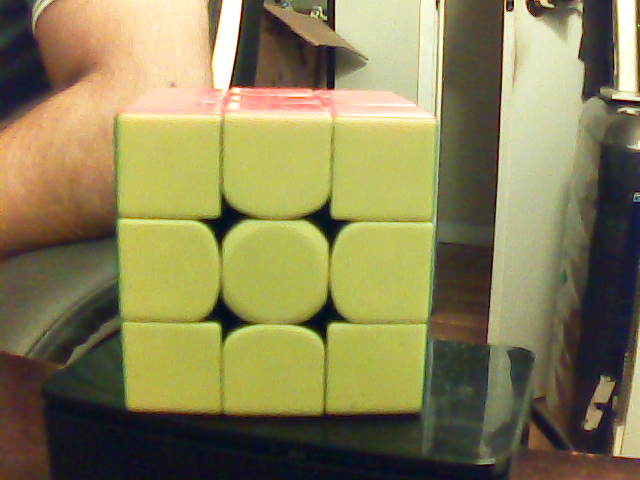

Stopped stream


In [238]:
import cv2
import time
from IPython.display import display, clear_output
from PIL import Image

# ======================
# CONFIG
# ======================
FPS = 30                    # <--- change this
FRAME_INTERVAL = 1.0 / FPS  # seconds per frame

# ======================
# Camera setup
# ======================
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap.release()
    cap = cv2.VideoCapture(1)

if not cap.isOpened():
    raise RuntimeError("Could not open DOFBOT camera")

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Warm up camera
time.sleep(0.3)
for _ in range(10):
    cap.read()

print(f"Streaming at ~{FPS} FPS (Kernel → Interrupt to stop)")

# ======================
# Streaming loop
# ======================
try:
    while True:
        start = time.time()

        ret, frame = cap.read()
        if not ret:
            print("Frame grab failed")
            break

        # BGR → RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        clear_output(wait=True)
        display(Image.fromarray(frame_rgb))

        # Throttle to target FPS
        elapsed = time.time() - start
        sleep_time = FRAME_INTERVAL - elapsed
        if sleep_time > 0:
            time.sleep(sleep_time)

except KeyboardInterrupt:
    print("Stopped stream")

finally:
    cap.release()

Saved image to captures/img_20251213_210207.jpg


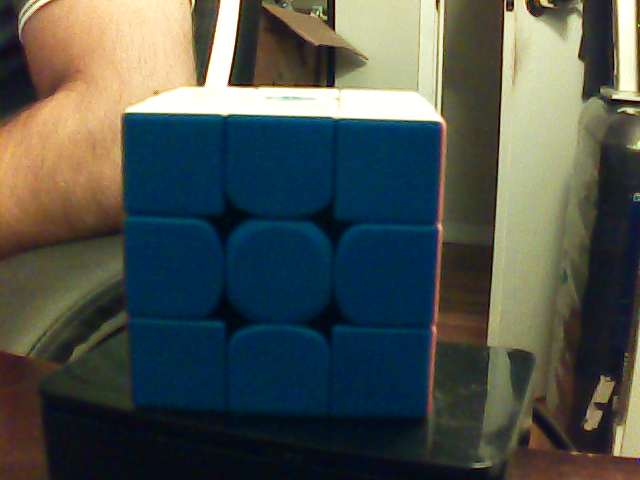

In [242]:
import cv2
import time
import os
from datetime import datetime
from IPython.display import display
from PIL import Image

# Output directory
OUT_DIR = "captures"
os.makedirs(OUT_DIR, exist_ok=True)

# Open camera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap.release()
    cap = cv2.VideoCapture(1)

if not cap.isOpened():
    raise RuntimeError("Could not open camera")

# Warm up camera
time.sleep(0.3)
for _ in range(10):
    cap.read()

# Capture frame
ret, frame = cap.read()
cap.release()

if not ret:
    raise RuntimeError("Failed to capture image")

# Save image
ts = datetime.now().strftime("%Y%m%d_%H%M%S")
path = os.path.join(OUT_DIR, f"img_{ts}.jpg")
cv2.imwrite(path, frame)

print(f"Saved image to {path}")

# Convert BGR → RGB for display
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display inline
display(Image.fromarray(frame_rgb))

In [ ]:
# Run @ end of session

del Arm
print("Disconnected")